In [206]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage.measure import regionprops,label

In [148]:
folder = 'valid'
path = '/kaggle/input/city-intersection-computer-vision'
names = [os.path.join(path,folder,name) for name in os.listdir(os.path.join(path,'valid'))]
images = [cv2.imread(name) for name in names]

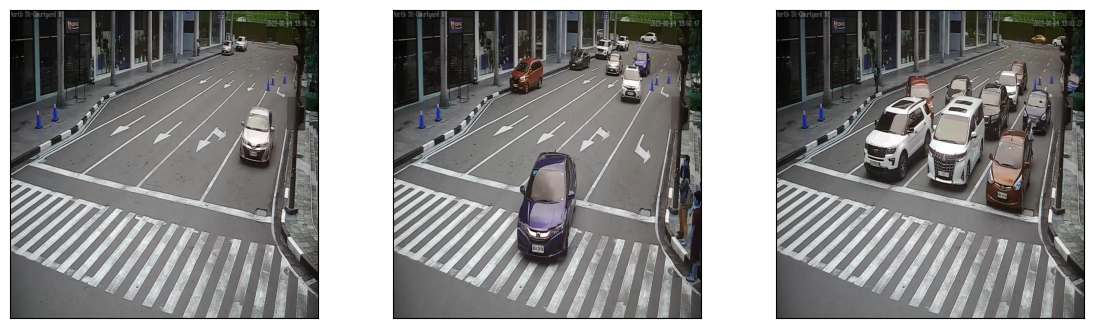

In [149]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (14,4))
base,setas,fundo = images[53],images[2],images[96]
for i,img in enumerate([base,setas,fundo]):
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

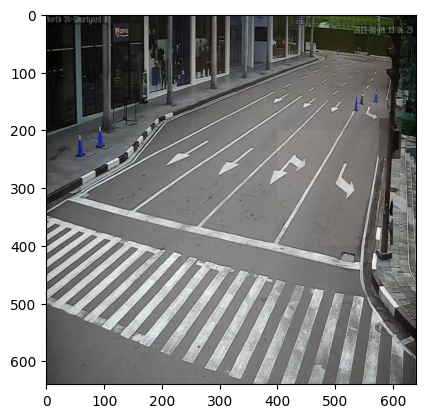

In [150]:
semcarros = base.copy()
ylim,xlim = slice(200,400),slice(400,600)
semcarros[ylim,xlim] = setas[ylim,xlim]
ylim,xlim = slice(0,100),slice(300,500)
semcarros[ylim,xlim] = fundo[ylim,xlim]
plt.imshow(semcarros)
plt.show()

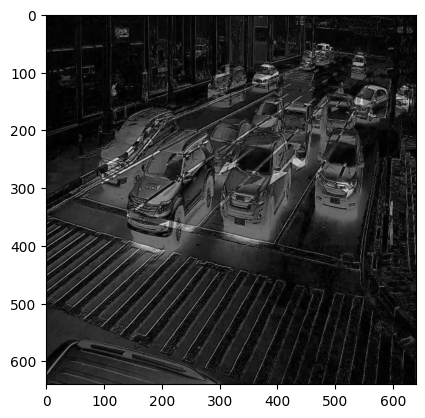

In [197]:
def dif_img(img):
    return cv2.absdiff(img,semcarros).mean(axis = 2)

img = images[0]
dif = dif_img(img)
plt.imshow(dif,'gray')
plt.show()

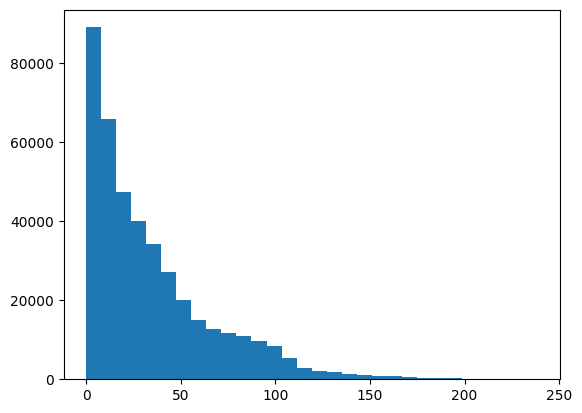

In [173]:
plt.hist(dif.ravel(),bins = 30)
plt.show()

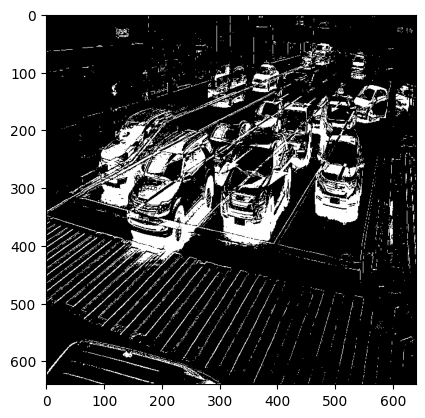

In [177]:
def binarizar(img,trashold):
    img = img.copy()
    img[img < trashold] = 0
    img[img >= trashold] = 255
    return img

mask = binarizar(dif,70)
plt.imshow(mask,'gray')
plt.show()

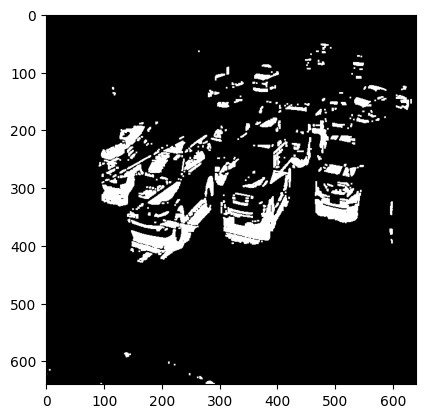

In [179]:
def open_mask(mask,kernel):
    return cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)

kernel = np.ones((3,3))
opened = open_mask(mask,kernel)
plt.imshow(opened,'gray')
plt.show()

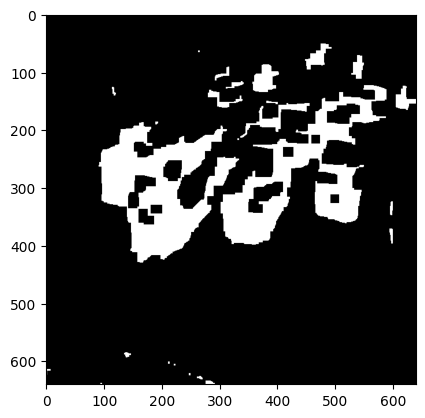

In [191]:
def close_mask(mask,kernel):
    return cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)

kernel = np.ones((15,15))
closed = close_mask(opened,kernel)
plt.imshow(closed,'gray')
plt.show()

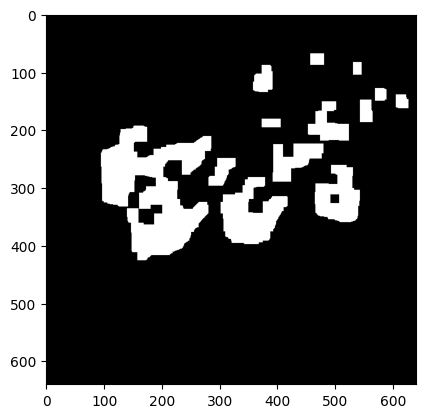

In [194]:
kernel = np.ones((15,15))
opened_2 = open_mask(closed,kernel)
plt.imshow(opened_2,'gray')
plt.show()

In [229]:
def rectangles_on_image(image,mask):
    stats = regionprops(label(mask.astype('uint8')))
    thick = 4
    fonte = 1
    alpha = .3
    image = image.copy()
    for stat in stats:
        miny,minx,maxy,maxx = stat.bbox
        image = cv2.rectangle(image,(minx,miny),(maxx,maxy),(255,0,0),thick)
        shapes = np.zeros_like(image,dtype = 'uint8')
        shapes = cv2.rectangle(shapes,(minx,miny),(maxx,maxy),(255,0,0),-1)
        mask = shapes.astype(bool)
        image[mask] = cv2.addWeighted(image,alpha,shapes,1 - alpha,0)[mask]
        label_start,label_end = (minx - thick // 2,miny),(minx + 60,miny - 20)
        image = cv2.rectangle(image,label_start,label_end,(255,0,0),-1)
        image = cv2.putText(image,'Carro',(minx + 5,miny-5),fonte,1,(255,255,255),2)
    return image

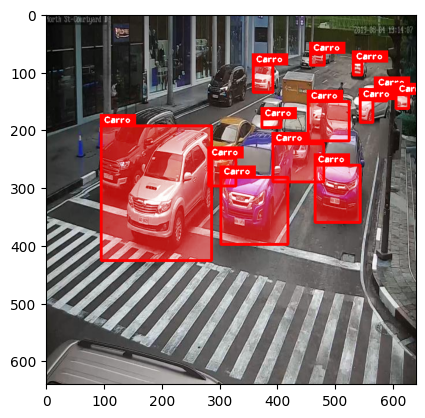

In [230]:
marked = rectangles_on_image(img,opened_2)
plt.imshow(marked)
plt.show()

In [231]:
def detect(img):
    original = img.copy()
    img = dif_img(img)
    img = binarizar(img,70)
    kernel = np.ones((3,3))
    img = open_mask(img,kernel)
    kernel = np.ones((15,15))
    img = close_mask(img,kernel)
    img = open_mask(img,kernel)
    return rectangles_on_image(original,img)

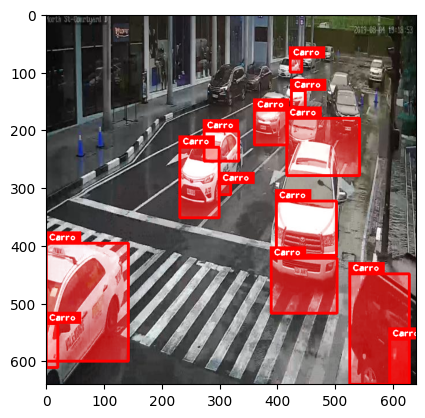

In [237]:
exemplo = images[19]
marked = detect(exemplo)
plt.imshow(marked)
plt.show()